In [2]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Path of directory
drive_path = "/content/drive/MyDrive"
root_path = f"{drive_path}/master/code-data/mxene_solvent"
solvent_path = f"{drive_path}/master/code-data/solvent"

In [4]:
import pandas as pd

In [5]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/008_dataset_mx_solvent_using_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(653, 63)


,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,gap_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,0.0,...,1,1,0,1,0,0,0,1,373.2,760.0
1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,0.0,...,1,1,0,3,0,0,0,1,351.5,760.0
2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,0.0,...,1,1,0,2,0,0,0,1,337.8,760.0
3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,0.0,...,0,1,0,4,0,0,0,1,329.3,760.0
4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,0.0,...,0,1,0,3,0,0,0,1,354.8,760.0


In [6]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]

In [7]:
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb

In [9]:
df_mx_solvent_data_labeled['method'] = df_mx_solvent_data_labeled['method'].astype('category').cat.codes

In [10]:
df_mx_solvent_data_labeled.head()

,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,work_function_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,Ti3C2,0,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,1.985656,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,Ti3C2,0,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,1.985656,...,46.07,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,Ti3C2,0,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,1.985656,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,Ti3C2,0,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,1.985656,...,58.08,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,Ti3C2,0,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,1.985656,...,41.05,0.0,23.8,29.3,0,1,0,3,0,354.8


In [11]:
features = ['method', 'δd', 'δp', 'δh', 'molarvolume', 'work_function_oh',
   'formation_energy_oh', 'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
   'plasmafrequency_x_oh', 'plasmafrequency_y_oh', 'has_inversion_symmetry_oh',
   'gap_o', 'work_function_o', 'formation_energy_o', 'ehull_o',
   'alphax_el_o', 'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
    'has_inversion_symmetry_o', 'work_function_f',
   'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f', 'plasmafrequency_x_f',
   'plasmafrequency_y_f', 'has_inversion_symmetry_f',
   'molecular_weight', 'xlogp',  'tpsa', 'complexity', 'h_bond_donor_count', 'h_bond_acceptor_count',
   'rotatable_bond_count', 'heavy_atom_count',  'atom_stereo_count',
    'boiling_point']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [12]:
X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')

/tmp/ipython-input-12-2546690500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')


In [13]:
X.head()

,method,δd,δp,δh,molarvolume,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,15.5,16.0,42.3,18.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,0,15.8,8.8,19.4,58.5,1.985656,-1.294839,0.123329,32.369286,32.369286,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,0,15.1,12.3,22.3,40.7,1.985656,-1.294839,0.123329,32.369286,32.369286,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,0,15.5,10.4,7.0,74.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,0,15.3,18.0,6.1,52.6,1.985656,-1.294839,0.123329,32.369286,32.369286,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [14]:
y.head()

,label
0,1
1,1
2,-1
3,-1
4,-1


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [17]:
X_train = X_scaled[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [18]:
label_map = {-1: 0, 1: 1}
labeled_mask = y != 0
y_labeled = y[labeled_mask].map(label_map)
X_labeled = X[labeled_mask]

In [19]:
X_unlabeled = X[y == 0]
df_unlabeled = df_mx_solvent_data_labeled[y == 0].copy()

In [20]:
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_labeled, y_labeled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [21]:
proba_unlabeled = clf.predict_proba(X_unlabeled)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

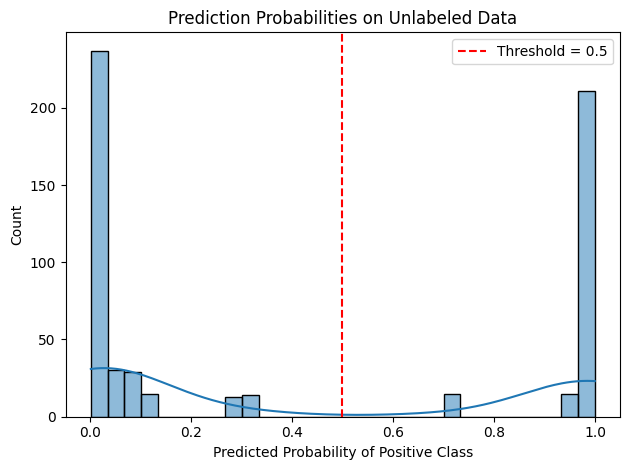

In [23]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba']])

                    solvent     mx  predicted_proba
114  N, N-dimethylformamide  Nb2C1         0.998902
115  N, N-dimethylformamide  Nb2C1         0.998902
269  N, N-dimethylformamide  Mo2C1         0.998902
270  N, N-dimethylformamide  Mo2C1         0.998902
192  N, N-dimethylformamide   V2C1         0.998902
191  N, N-dimethylformamide   V2C1         0.998902
428  N, N-dimethylformamide  Zr3C2         0.998902
427  N, N-dimethylformamide  Zr3C2         0.998902
348  N, N-dimethylformamide  Ti2C1         0.998902
349  N, N-dimethylformamide  Ti2C1         0.998902
508  N, N-dimethylformamide   V4C3         0.998902
507  N, N-dimethylformamide   V4C3         0.998902
586  N, N-dimethylformamide  Ta4C3         0.998902
585  N, N-dimethylformamide  Ta4C3         0.998902
124       N-methylformamide  Nb2C1         0.998826
74        N-methylformamide  Ti3C2         0.998826
125       N-methylformamide  Nb2C1         0.998826
281       N-methylformamide  Mo2C1         0.998826
361       N-

In [26]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent', 'predicted_proba']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx    solvent  predicted_proba
596  Ta4C3   n-Hexane         0.002504
516   V4C3   n-Hexane         0.002504
200   V2C1   n-Hexane         0.002504
517   V4C3   n-Hexane         0.002504
201   V2C1   n-Hexane         0.002504
280  Mo2C1   n-Hexane         0.002504
279  Mo2C1   n-Hexane         0.002504
595  Ta4C3   n-Hexane         0.002504
437  Zr3C2   n-Hexane         0.002504
438  Zr3C2   n-Hexane         0.002504
359  Ti2C1   n-Hexane         0.002504
358  Ti2C1   n-Hexane         0.002504
123  Nb2C1   n-Hexane         0.002504
122  Nb2C1   n-Hexane         0.002504
228   V2C1  n-Heptane         0.004521
87   Ti3C2  n-Heptane         0.004521
465  Zr3C2  n-Heptane         0.004521
545   V4C3  n-Heptane         0.004521
544   V4C3  n-Heptane         0.004521
466  Zr3C2  n-Heptane         0.004521


In [28]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    579.000000
mean       0.430766
std        0.460080
min        0.002504
25%        0.010832
50%        0.099283
75%        0.985275
max        0.998902
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)          296
Low (0.1–0.3)             28
Mid (0.3–0.5)             14
High (0.5–0.7)             0
Very High (0.7–0.9)       15
Extremely High (>0.9)    226
Name: count, dtype: int64


In [29]:
train_path = f"{drive_path}/master/code-data/training/"

In [30]:
df_unlabeled.to_csv(f"{train_path}/002_positive_vs_negative_predictions_on_unlabeled_xgboost.csv")
df_unlabeled.to_pickle(f"{train_path}/002_positive_vs_negative_predictions_on_unlabeled_xgboost.pkl")


                      Feature  Importance
36                 complexity    0.386897
3                          δh    0.152587
42              boiling_point    0.151340
35                       tpsa    0.092918
4                 molarvolume    0.082835
38      h_bond_acceptor_count    0.040834
2                          δp    0.033176
34                      xlogp    0.029185
1                          δd    0.020683
33           molecular_weight    0.009544
0                      method    0.000000
10               alphaz_el_oh    0.000000
9                alphay_el_oh    0.000000
8                alphax_el_oh    0.000000
7                    ehull_oh    0.000000
6         formation_energy_oh    0.000000
5            work_function_oh    0.000000
11       plasmafrequency_x_oh    0.000000
12       plasmafrequency_y_oh    0.000000
19                alphay_el_o    0.000000
20                alphaz_el_o    0.000000
13  has_inversion_symmetry_oh    0.000000
14                      gap_o    0

/tmp/ipython-input-31-4016910764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


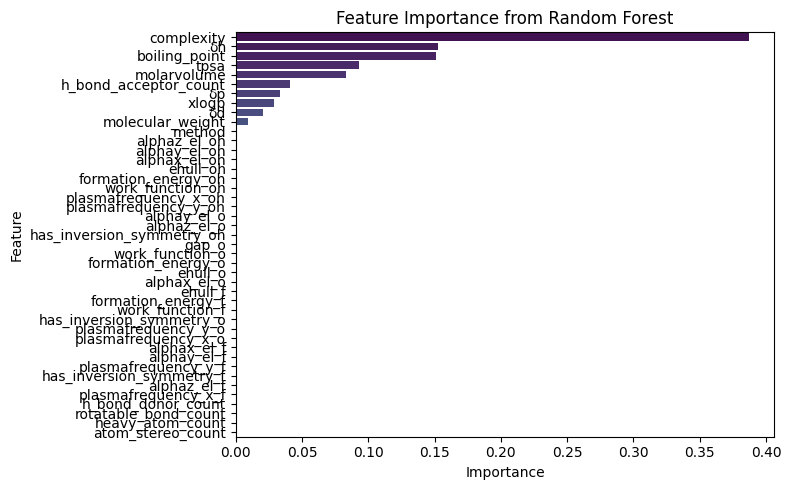

In [31]:
importances = clf.feature_importances_
feature_names = features

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

Top 10 Feature Importances:
                  Feature  Importance
36             complexity    0.386897
3                      δh    0.152587
42          boiling_point    0.151340
35                   tpsa    0.092918
4             molarvolume    0.082835
38  h_bond_acceptor_count    0.040834
2                      δp    0.033176
34                  xlogp    0.029185
1                      δd    0.020683
33       molecular_weight    0.009544


/tmp/ipython-input-32-3810259604.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


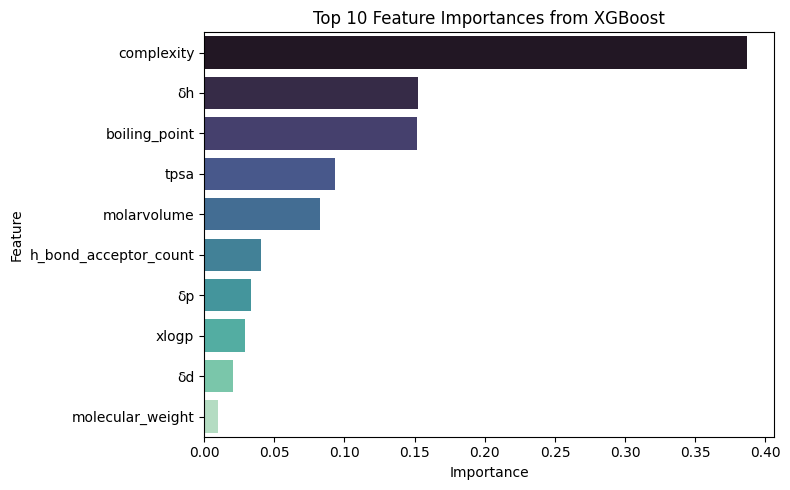

In [32]:

# Create and sort feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)  # Change to .head(15) for top 15

# Print top features
print("Top 10 Feature Importances:")
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title('Top 10 Feature Importances from XGBoost')
plt.tight_layout()
plt.show()